## Understanding the Recipie behind a Block Buster Movie

### 1. Business Understanding

A commercial success movie not only entertains audience, but also enables film companies to gain tremendous profit. A lot of factors such as good directors, experienced actors are considerable for creating good movies. However, famous directors and actors can always bring an expected box-office income but cannot guarantee a highly rated imdb score.

The dataset contains 28 variables for 5043 movies, spanning across 100 years in 66 countries. There are 2399 unique director names, and thousands of actors/actresses. “imdb_score” is the response variable while the other 27 variables are possible predictors.

* movie_title:	              Title of the Movie
* duration:	                  Duration in minutes
* director_name:	          Name of the Director of the Movie
* director_facebook_likes:    Number of likes of the Director on his Facebook Page
* actor_1_name:	              Primary actor starring in the movie
* actor_1_facebook_likes:	  Number of likes of the Actor_1 on his/her Facebook Page
* actor_2_name:	              Other actor starring in the movie
* actor_2_facebook_likes:	  Number of likes of the Actor_2 on his/her Facebook Page
* actor_3_name:	              Other actor starring in the movie
* actor_3_facebook_likes:	  Number of likes of the Actor_3 on his/her Facebook Page
* num_user_for_reviews:	      Number of users who gave a review
* num_critic_for_reviews:	  Number of critical reviews on imdb
* num_voted_users:	          Number of people who voted for the movie
* cast_total_facebook_likes:  Total number of facebook likes of the entire cast of the movie
* movie_facebook_likes:       Number of Facebook likes in the movie page
* plot_keywords:              Keywords describing the movie plot
* facenumber_in_poster:	      Number of the actor who featured in the movie poster
* color:                      ‘Black and White’ or ‘Color’
* genres:	                  ‘Animation’, ‘Comedy’, ‘Romance’, ‘Horror’, ‘Sci-Fi’, ‘Action’, ‘Family’
* title_year:                 The year in which the movie is released (1916:2016)
* language:                   English, Arabic, Chinese, French, German, Danish, Italian, Japanese etc
* country:                    Country where the movie is produced
* content_rating:             Content rating of the movie
* aspect_ratio:               Aspect ratio the movie was made in
* movie_imdb_link:            IMDB link of the movie
* gross:                      Gross earnings of the movie in Dollars
* budget:                     Budget of the movie in Dollars
* movie_score:                IMDB movie Score of the movie on IMDB

### Importing relevant libraries

In [265]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot

#### Importing the dataset

In [266]:
dataset = pd.read_excel("movie_metadata.xls", skipinitialspace=True)
dataset.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


#### Checking for duplicate rows

In [267]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = dataset[dataset.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF.shape)

Duplicate Rows except first occurrence based on all columns are :
(45, 28)


#### There seems to be 45 duplicate rows in the dataset. Hence keeping only the first unique row and deleting the remaining

In [268]:
print("Number of observation before removing:",dataset.shape)
dataset = dataset.drop_duplicates()
print("Number of observation after removing:",dataset.shape)

Number of observation before removing: (5043, 28)
Number of observation after removing: (4998, 28)


In [5]:
dataset.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes
count,4949.000000,4983.000000,4895.000000,4975.000000,4991.000000,4.124000e+03,4.998000e+03,4998.000000,4985.000000,4977.000000,4.511000e+03,4891.000000,4985.000000,4998.000000,4671.000000,4998.000000
mean,139.890079,107.213325,688.679060,639.900905,6556.939892,4.832565e+07,8.347020e+04,9676.941176,1.368907,272.014667,3.974787e+07,2002.468820,1642.998796,6.441056,2.221417,7487.430172
std,121.477586,25.248775,2821.649616,1643.298282,15061.586700,6.796483e+07,1.380866e+05,18165.404578,2.014623,377.776210,2.069689e+08,12.475235,4030.925303,1.124107,1.391185,19290.726563
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,611.500000,5.304835e+06,8.560000e+03,1405.500000,0.000000,64.000000,6.000000e+06,1999.000000,280.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,369.000000,984.000000,2.544575e+07,3.426050e+04,3085.500000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,162.500000
75%,195.000000,118.000000,192.000000,635.000000,11000.000000,6.231942e+07,9.612075e+04,13740.500000,2.000000,324.000000,4.500000e+07,2011.000000,917.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [6]:
dataset.astype('object').describe().transpose()

,count,unique,top,freq
color,4979,2,Color,4772
director_name,4895,2398,Steven Spielberg,26
num_critic_for_reviews,4949,528,1,42
duration,4983,191,90,160
director_facebook_likes,4895,435,0,897
actor_3_facebook_likes,4975,906,1000,125
actor_2_name,4985,3032,Morgan Freeman,20
actor_1_facebook_likes,4991,878,1000,443
gross,4124,4035,8e+06,3
genres,4998,914,Drama,235


#### Some observations from the data

*	Only **5%** of the movies are made in **black and white** screen rest are **color**
*	The average playtime of a movie was approximately **107 min**
*	Around **94%** of movies were made in English language
*	**79%** of the movies were produced in **USA**
*	**Average movie score** was **6.4** with 1.6 being minimum and 9.5 being maximum
*   The average budget of a movie is approximately **206 million dollars** 

### 2. Data Prepration

Since gross and budget have too many missing values, and we want to keep these two variables for the following analysis, we can only delete rows with null values for gross and budget because imputation will not do a good job here.

In [269]:
# dropping the rows which has gross value equals to zero
print("Number of observation before removing:",dataset.shape)
dataset.dropna(axis=0, subset=['gross'], inplace=True)
print("Number of observation after removing:",dataset.shape)

Number of observation before removing: (4998, 28)
Number of observation after removing: (4124, 28)


In [270]:
# dropping the rows which has budget value equals to zero
print("Number of observation before removing:",dataset.shape)
dataset.dropna(axis=0, subset=['budget'], inplace=True)
print("Number of observation after removing:",dataset.shape)

Number of observation before removing: (4124, 28)
Number of observation after removing: (3857, 28)


#### Checking missing values

Majority of the columns seems to have some missing values

In [9]:
(dataset.isnull().sum() / len(dataset))*100

color                        0.051854
director_name                0.000000
num_critic_for_reviews       0.025927
duration                     0.025927
director_facebook_likes      0.000000
actor_3_facebook_likes       0.259269
actor_2_name                 0.129634
actor_1_facebook_likes       0.077781
gross                        0.000000
genres                       0.000000
actor_1_name                 0.077781
movie_title                  0.000000
num_voted_users              0.000000
cast_total_facebook_likes    0.000000
actor_3_name                 0.259269
facenumber_in_poster         0.155561
plot_keywords                0.803733
movie_movie_link             0.000000
num_user_for_reviews         0.000000
language                     0.077781
country                      0.000000
content_rating               1.322271
budget                       0.000000
title_year                   0.000000
actor_2_facebook_likes       0.129634
movie_score                  0.000000
aspect_ratio

#### Imputing missing numerical values with mean

In [271]:
dataset['aspect_ratio']=pd.DataFrame(dataset['aspect_ratio'].fillna(dataset.aspect_ratio.mean()))
dataset['facenumber_in_poster']=pd.DataFrame(dataset['facenumber_in_poster'].fillna(dataset.facenumber_in_poster.mean()))
dataset['num_critic_for_reviews']=pd.DataFrame(dataset['num_critic_for_reviews'].fillna(dataset.num_critic_for_reviews.mean()))
dataset['duration']=pd.DataFrame(dataset['duration'].fillna(dataset.duration.mean()))
dataset['director_facebook_likes']=pd.DataFrame(dataset['director_facebook_likes'].fillna(dataset.director_facebook_likes.mean()))
dataset['actor_3_facebook_likes']=pd.DataFrame(dataset['actor_3_facebook_likes'].fillna(dataset.actor_3_facebook_likes.mean()))
dataset['actor_1_facebook_likes']=pd.DataFrame(dataset['actor_1_facebook_likes'].fillna(dataset.actor_1_facebook_likes.mean()))
dataset['cast_total_facebook_likes']=pd.DataFrame(dataset['cast_total_facebook_likes'].fillna(dataset.cast_total_facebook_likes.mean()))
dataset['actor_2_facebook_likes']=pd.DataFrame(dataset['actor_2_facebook_likes'].fillna(dataset.actor_2_facebook_likes.mean()))
dataset['movie_facebook_likes']=pd.DataFrame(dataset['movie_facebook_likes'].fillna(dataset.movie_facebook_likes.mean()))

#### Taking care of missing categorical values

#### 1. Content Rating

In [272]:
dataset.content_rating.unique()

array(['PG-13', 'PG', 'G', 'R', 'Approved', 'NC-17', nan, 'X',
       'Not Rated', 'Unrated', 'M', 'GP', 'Passed'], dtype=object)

In [273]:
# dropping the rows which has content_rating value equals as NaN
print("Number of observation before removing:",dataset.shape)
dataset.dropna(axis=0, subset=['content_rating'], inplace=True)
print("Number of observation after removing:",dataset.shape)

Number of observation before removing: (3857, 28)
Number of observation after removing: (3806, 28)


In [274]:
dataset['content_rating']=dataset['content_rating'].replace(['M'], 'PG')
dataset['content_rating']=dataset['content_rating'].replace(['GP'], 'PG')
dataset['content_rating']=dataset['content_rating'].replace(['X'], 'NC-17')
dataset['content_rating']=dataset['content_rating'].replace(['Approved'], 'R')
dataset['content_rating']=dataset['content_rating'].replace(['Not Rated'], 'R')
dataset['content_rating']=dataset['content_rating'].replace(['Passed'], 'R')
dataset['content_rating']=dataset['content_rating'].replace(['Unrated'], 'R')

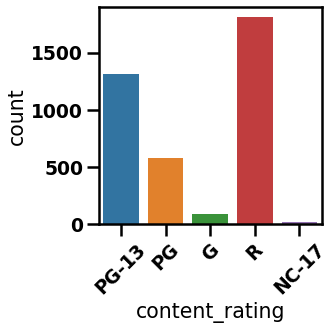

In [275]:
plt.figure(figsize = (4, 4))
sns.countplot(x = 'content_rating', data = dataset)
xt = plt.xticks(rotation=45)

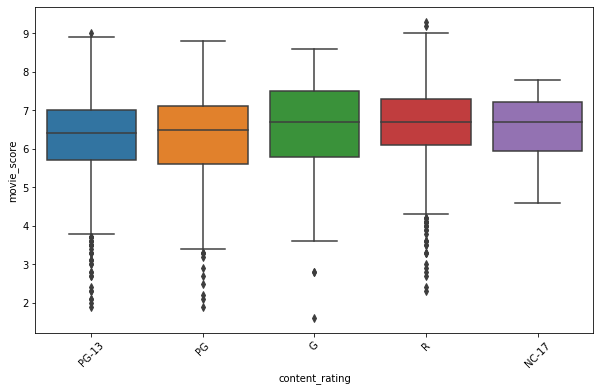

In [15]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'content_rating', y = 'movie_score',  data = dataset)
xt = plt.xticks(rotation=45)

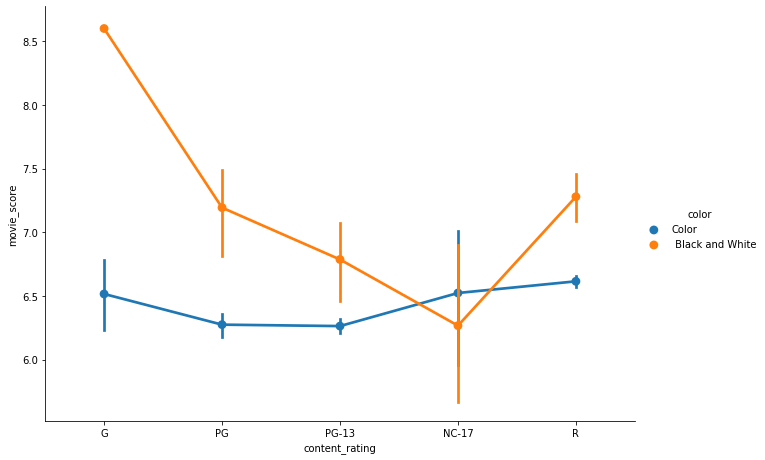

In [38]:
np.seterr(divide='ignore', invalid='ignore')
import warnings
warnings.filterwarnings("ignore")

sns.factorplot('content_rating', 'movie_score', hue = 'color', estimator = np.mean, data = dataset, 
             height = 6.5, aspect = 1.4, order = ['G', 'PG', 'PG-13', 'NC-17', 'R'])


**gross & budget:** We have gross and budget information. So let’s add two colums: profit and percentage return on investment for further analysis.


In [276]:
dataset['profit'] = dataset['gross'] - dataset['budget']
dataset['return_on_investment_perc'] = (dataset['profit']/dataset['budget'])*100

#### Movie Title

The column movie_title has some special character. Lets remove them.

In [277]:
dataset['movie_title'] = dataset['movie_title'].str.replace('¬†', '')

#### Top 20 Profitable Movies of the Century

In [278]:
prf = dataset[['movie_title','profit']] 
prf = prf.sort_values('profit',ascending = False)[:20]

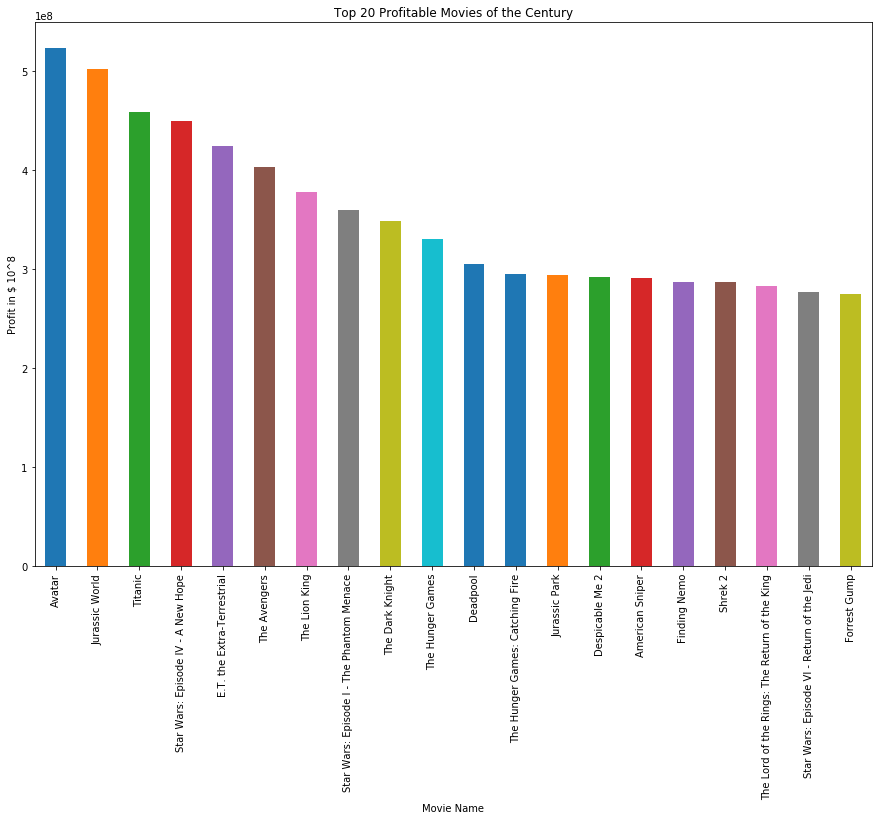

In [118]:
prf = pd.DataFrame(prf, columns = ['movie_title' , 'profit'])
prf.plot(kind='bar',x='movie_title',y='profit',figsize=(15, 10))
plt.title('Top 20 Profitable Movies of the Century')
plt.ylabel("Profit in $ 10^8")
plt.xlabel("Movie Name")
legend = plt.legend()
legend.remove()
plt.show()

#### 20 Most Profitable movies based on Return of Investment

In [279]:
roi = dataset[['movie_title','budget','return_on_investment_perc','profit']] 
roi = roi.sort_values('profit',ascending = False)[:20]
roi.reset_index(drop=True, inplace=True)

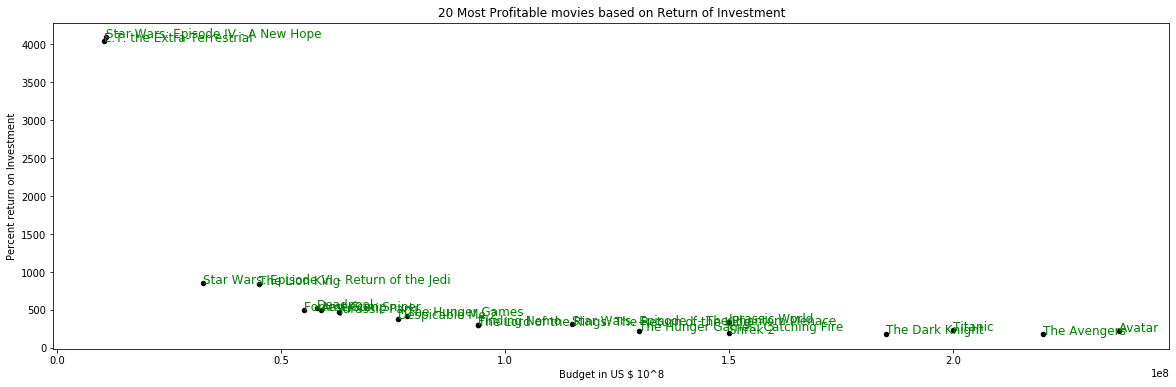

In [187]:
p1 = roi.plot(kind="scatter",x="budget",y="return_on_investment_perc",color="black",figsize=(20,6))
for line in range(0,roi.shape[0]):
     p1.text(roi.budget[line]+0.2, roi.return_on_investment_perc[line], roi.movie_title[line], horizontalalignment='left', 
             size='large', color='green')
plt.title("20 Most Profitable movies based on Return of Investment")
plt.xlabel("Budget in US $ 10^8")
plt.ylabel("Percent return on Investment")
plt.show()

**color:** More than 96% movies are colored, which indicates that this predictor is nearly constant. Let’s remove this predict

In [280]:
print(dataset.color.value_counts())
print(dataset.color.isnull().value_counts())

Color               3680
 Black and White     124
Name: color, dtype: int64
False    3804
True        2
Name: color, dtype: int64


In [281]:
dataset = dataset.drop(['color'], axis=1)

**language:** Over 95% movies are in English, which means this variable is nearly constant. Let’s remove it.

In [282]:
dataset = dataset.drop(['language'], axis=1)

**country:** Around 79% movies are from USA, 8% from UK, 13% from other countries. So we group other countries together to make this categorical variable with less levels: USA, UK, Others.

In [283]:
def ctry(df):
    if df['country'] == 'USA':
        return 'United States'
    elif df['country'] == 'UK':
        return 'United Kingdom'
    else:
        return 'other' 
        
dataset['country'] = dataset.apply(ctry, axis=1)

In [284]:
dataset.country.value_counts()

United States     3025
other              465
United Kingdom     316
Name: country, dtype: int64

#### Director and their respective Gross Income and IMDB Score of Film

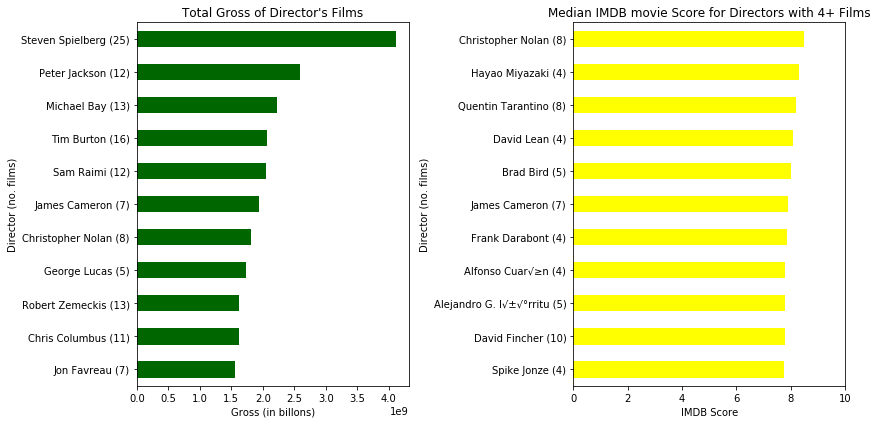

In [194]:
def create_comparison_database(name, value, x, no_films):
    
    comparison_df = dataset.groupby(name, as_index=False)
    
    if x == 'mean':
        comparison_df = comparison_df.mean()
    elif x == 'median':
        comparison_df = comparison_df.median()
    elif x == 'sum':
        comparison_df = comparison_df.sum() 
    
    # Create database with either name of directors or actors, the value being compared i.e. 'gross',
    # and number of films they're listed with. Then sort by value being compared.
    name_count_key = dataset[name].value_counts().to_dict()
    comparison_df['films'] = comparison_df[name].map(name_count_key)
    comparison_df.sort_values(value, ascending=False, inplace=True)
    comparison_df[name] = comparison_df[name].map(str) + " (" + comparison_df['films'].astype(str) + ")"
   
    # create a Series with the name as the index so it can be plotted to a subgrid
    comp_series = comparison_df[comparison_df['films'] >= no_films][[name, value]][10::-1].set_index(name).iloc[:,0]
    
    return comp_series

fig = plt.figure(figsize=(18,6))

# Director_name
plt.subplot2grid((2,3),(0,0), rowspan = 2)
create_comparison_database('director_name','gross','sum', 0).plot(kind='barh', color='#006600')
plt.legend().set_visible(False)
plt.title("Total Gross of Director's Films")
plt.ylabel("Director (no. films)")
plt.xlabel("Gross (in billons)")

plt.subplot2grid((2,3),(0,1), rowspan = 2)
create_comparison_database('director_name','movie_score','median', 4).plot(kind='barh', color='#ffff00')
plt.legend().set_visible(False)
plt.title('Median IMDB movie Score for Directors with 4+ Films')
plt.ylabel("Director (no. films)")
plt.xlabel("IMDB Score")
plt.xlim(0,10)

plt.tight_layout()

#### Removing Names

We have 1709 directors, and 6365 actors in this data.

In [195]:
dataset.astype('object').describe().transpose()

,count,unique,top,freq
director_name,3806,1709,Steven Spielberg,25
num_critic_for_reviews,3806,529,81,30
duration,3806,153,101,113
director_facebook_likes,3806,396,0,657
actor_3_facebook_likes,3806,884,1000,115
actor_2_name,3804,2246,Morgan Freeman,20
actor_1_facebook_likes,3806,730,1000,350
gross,3806,3720,8e+06,3
genres,3806,751,Comedy|Drama|Romance,150
actor_1_name,3805,1473,Robert De Niro,42


Since all the names are so different for the whole dataset, there is no point to use names to predict score.

Same with plot keywords, they are too diverse to be used in the prediction.

And movie link is also a redundant variable.

In [285]:
print("Number of observation before removing:",dataset.shape)
dataset.drop(['director_name','actor_1_name','actor_2_name','actor_3_name','movie_title','plot_keywords','movie_movie_link'],
axis=1, inplace=True)
print("Number of observation after removing:",dataset.shape)

Number of observation before removing: (3806, 28)
Number of observation after removing: (3806, 21)


For the purpose of data exploration, we added two variables based on existing variables: profit and return_on_investment_perc. In order to avoid multicollinearity, here we remove these two added variables.

In [286]:
print("Number of observation before removing:",dataset.shape)
dataset.drop(['profit','return_on_investment_perc'], axis=1, inplace=True)
print("Number of observation after removing:",dataset.shape)

Number of observation before removing: (3806, 21)
Number of observation after removing: (3806, 19)


#### Remove Highly Correlated Variables

#### Correlatoin Matrix

From below correlation matrix we can see high correlation (greater than 0.7) between :-

1) **cast_total_facebook_likes** and **actor_1_facebook_likes**, **actor_2_facebook_likes**, **actor_3_facebook_likes**

2) **num_voted_users** and **num_user_for_reviews**

3) **movie_facebook_likes** and **num_critic_for_reviews**

5) **num_user_for_reviews** and **num_critic_for_reviews**

According to the highest correlation value 0.95, we find actor_1_facebook_likes is highly correlated with the cast_total_facebook_likes, and both actor2 and actor3 are also somehow correlated to the total. So we want to modify them into two variables: actor_1_facebook_likes and other_actors_facebook_likes.

There are high correlations among num_voted_users, num_user_for_reviews and num_critic_for_reviews. We want to keep num_voted_users and take the ratio of num_user_for_reviews and num_critic_for_reviews.

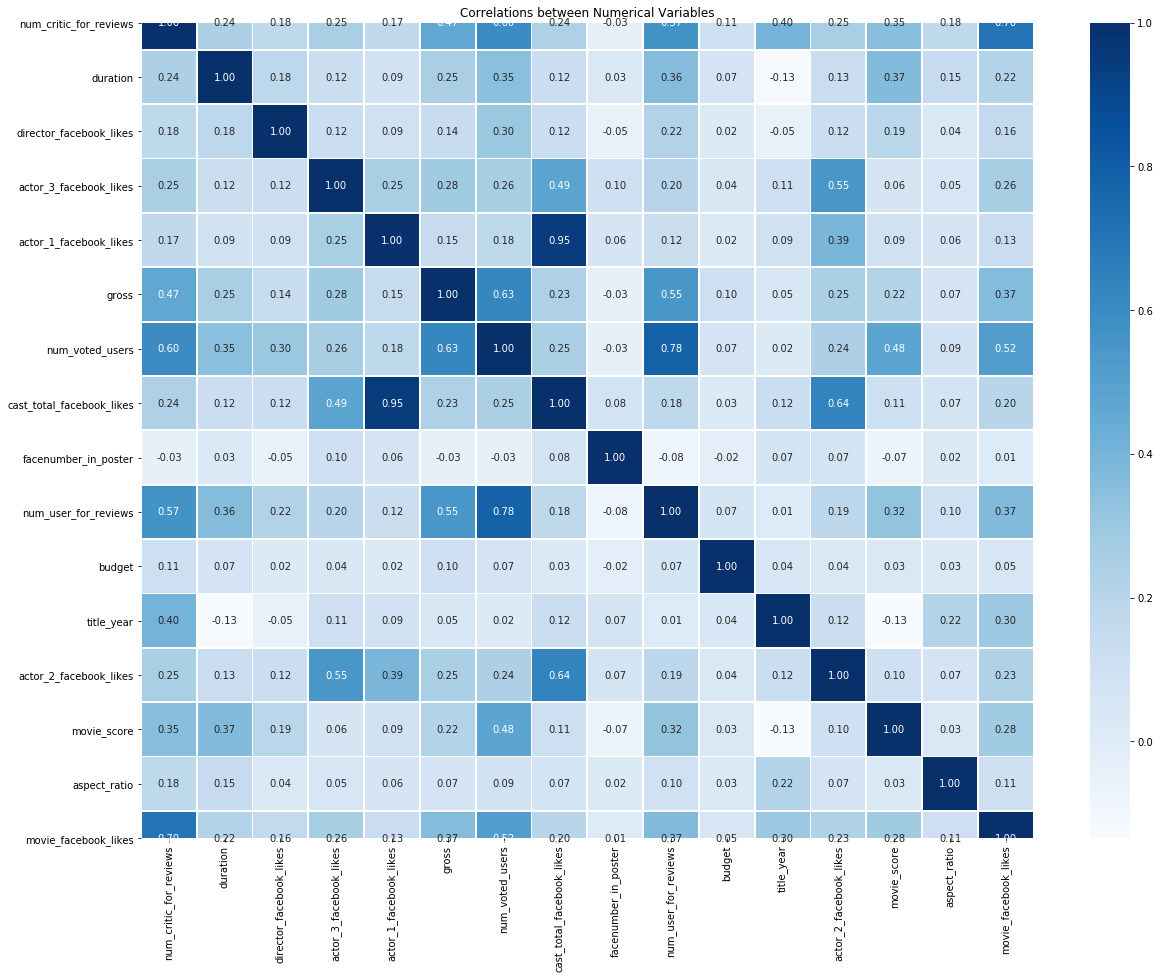

<Figure size 432x288 with 0 Axes>

In [198]:
f,ax=plt.subplots(figsize=(20,15))
sns.heatmap(dataset.corr(),annot=True,linewidth=.8,fmt=".2f",ax=ax,cmap="Blues")
plt.title("Correlations between Numerical Variables")
plt.show()
plt.tight_layout()

In [287]:
# add up actor 2 and 3 facebook likes into other actors facebook likes
dataset['other_actors_facebook_likes'] = dataset['actor_2_facebook_likes'] + dataset['actor_3_facebook_likes']

dataset['critic_review_ratio'] = dataset['num_critic_for_reviews']/dataset['num_user_for_reviews']

# delete columns

print("Number of observation before removing:",dataset.shape)
dataset.drop(['cast_total_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'num_critic_for_reviews', 'num_user_for_reviews'], axis=1, inplace=True)
print("Number of observation after removing:",dataset.shape)

Number of observation before removing: (3806, 21)
Number of observation after removing: (3806, 16)


We don’t see any strong correlation (absolute value greater than 0.7) any more.

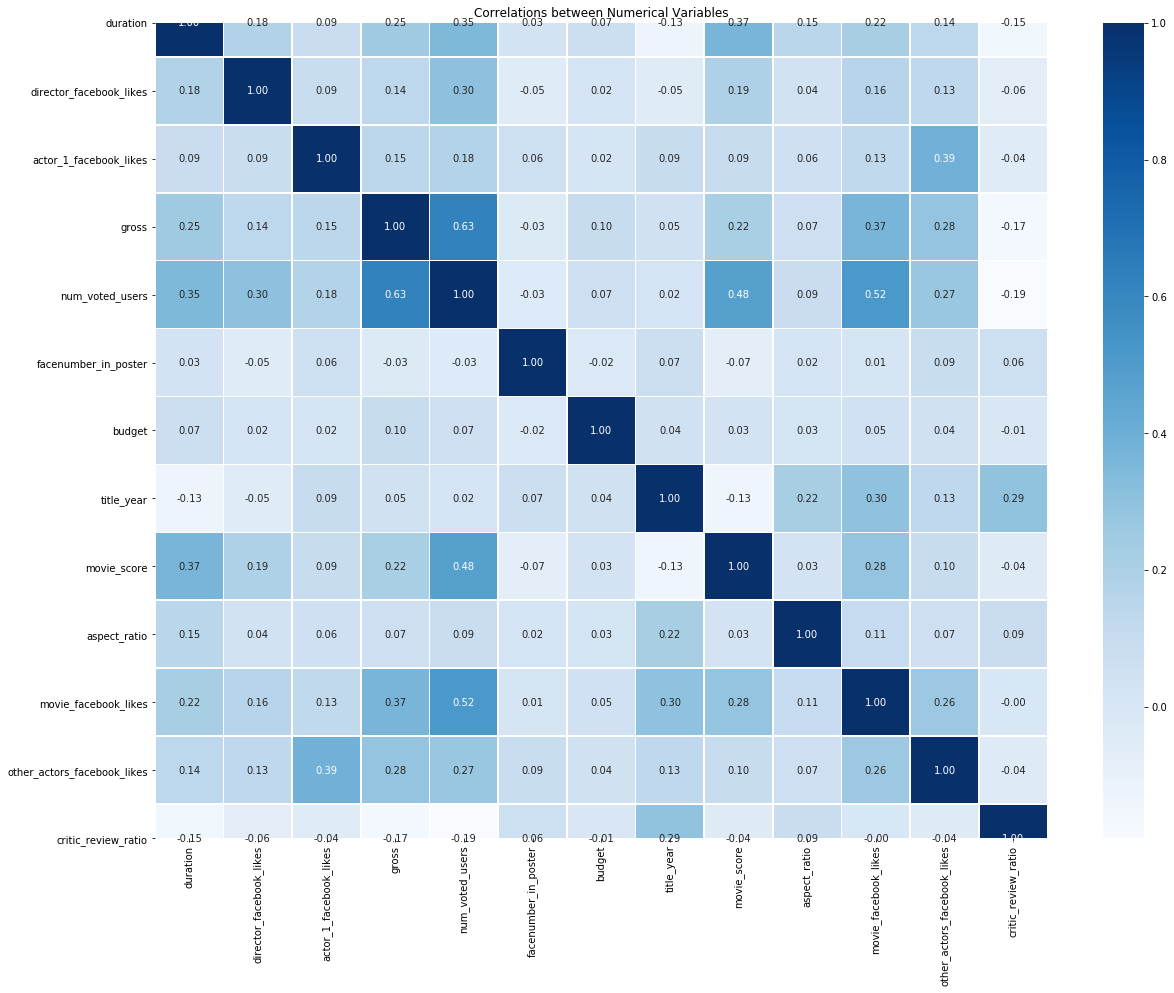

<Figure size 432x288 with 0 Axes>

In [200]:
f,ax=plt.subplots(figsize=(20,15))
sns.heatmap(dataset.corr(),annot=True,linewidth=.8,fmt=".2f",ax=ax,cmap="Blues")
plt.title("Correlations between Numerical Variables")
plt.show()
plt.tight_layout()

### 3. Data Analysis & Visualization

#### Movie score distribution

The plot seems to be rightly skewed with average movie score of 6.4.

Text(0.5, 1.0, 'Movie Score distribution')

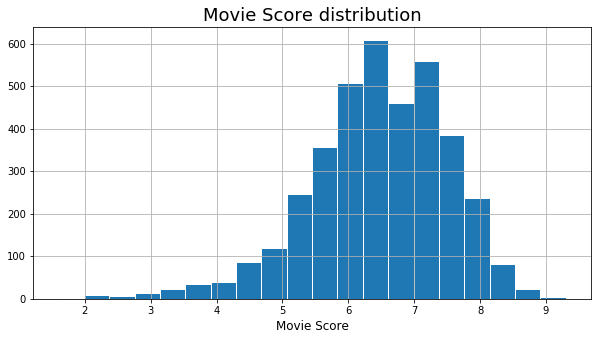

In [203]:
dataset['movie_score'].hist(bins=20, figsize=(10,5), edgecolor='white',)
plt.xlabel('Movie Score', fontsize=12)
plt.title('Movie Score distribution', fontsize=18)

Movie production just exploded after year 1990. It could be due to advancement in technology and commercialisation of internet.

Text(0.5, 1.0, 'Movie produced overtime')

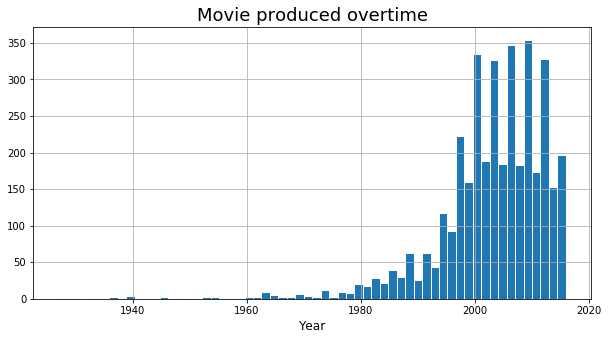

In [202]:
dataset['title_year'].hist(bins=60, figsize=(10,5), edgecolor='white')
plt.xlabel('Year', fontsize=12)
plt.title('Movie produced overtime', fontsize=18)

#### Films by decade

Majority of the films were released in 2000's

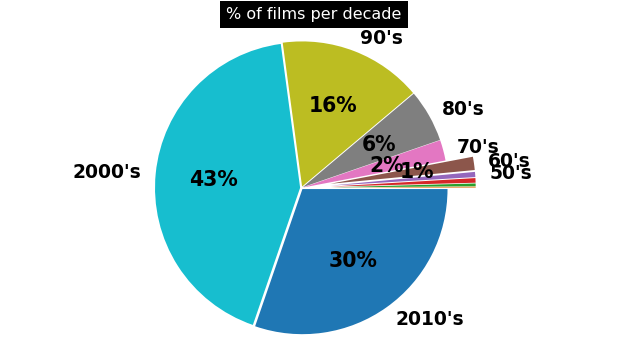

In [210]:
dataset['decade'] = dataset['title_year'].apply(lambda x:((x-1900)//10)*10)
#__________________________________________________________________
# function that extract statistical parameters from a grouby objet:
def get_stats(gr):
    return {'min':gr.min(),'max':gr.max(),'count': gr.count(),'mean':gr.mean()}
#______________________________________________________________
# Creation of a dataframe with statitical infos on each decade:
test = dataset['title_year'].groupby(dataset['decade']).apply(get_stats).unstack()

sns.set_context("poster", font_scale=0.85)
#_______________________________
# funtion used to set the labels
def label(s):
    val = (1900 + s, s)[s < 100]
    chaine = '' if s < 50 else "{}'s".format(int(val))
    return chaine
#____________________________________
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
labels = [label(s) for s in  test.index]
sizes  = test['count'].values
explode = [0.2 if sizes[i] < 100 else 0.01 for i in range(11)]
ax.pie(sizes, explode = explode, labels=labels,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=0)
ax.axis('equal')
ax.set_title('% of films per decade',
             bbox={'facecolor':'k', 'pad':5},color='w', fontsize=16);
dataset.drop('decade', axis=1, inplace = True)

#### Percentage of film by country

Biggest film producer in the world was USA

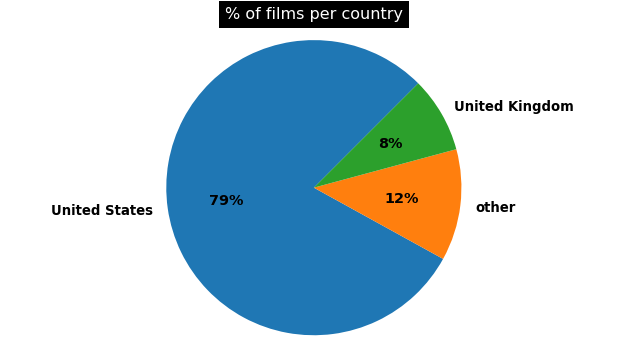

In [205]:
df_countries = dataset['title_year'].groupby(dataset['country']).count()
df_countries = df_countries.reset_index()
df_countries.rename(columns ={'title_year':'count'}, inplace = True)
df_countries = df_countries.sort_values('count', ascending = False)
df_countries.reset_index(drop=True, inplace = True)

sns.set_context("poster", font_scale=0.6)
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
labels = [s[0] if s[1] > 80 else ' ' 
          for index, s in  df_countries[['country', 'count']].iterrows()]
sizes  = df_countries['count'].values
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(df_countries))]
ax.pie(sizes, explode = explode, labels = labels,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=45)
ax.axis('equal')
ax.set_title('% of films per country',
             bbox={'facecolor':'k', 'pad':5},color='w', fontsize=16);

#### Movie based on country of origin

In [ ]:
data = dict(type='choropleth',
locations = df_countries['country'],
locationmode = 'country names', z = df_countries['count'],
text = df_countries['country'], colorbar = {'title':'Number of films.'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
reversescale = False)

layout = dict(title='Movie based on country of origin',
geo = dict(showframe = True, projection={'type':'Mercator'}))

choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

#### Most popular genre in the movies

In [289]:
genre_labels = set()
for s in dataset['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

In [290]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):        
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue        
        for s in [s for s in liste_keywords if s in liste]: 
            if pd.notnull(s): keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [ ]:
keyword_occurences, dum = count_word(dataset, 'genres', genre_labels)
keyword_occurences[:5]

#### Genres

Most popular genre were Drama, Comdey and Thriller

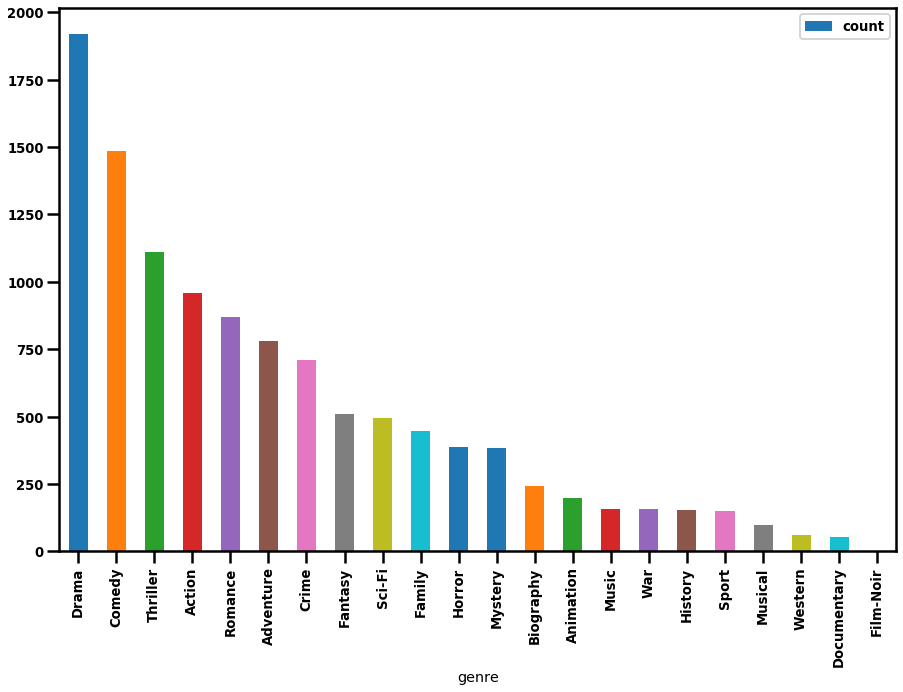

In [424]:
df = pd.DataFrame(keyword_occurences, columns = ['genre' , 'count'])
df.plot(kind='bar',x='genre',y='count',figsize=(15, 10))

#### Plotting the correspondig Genre Wordcloud

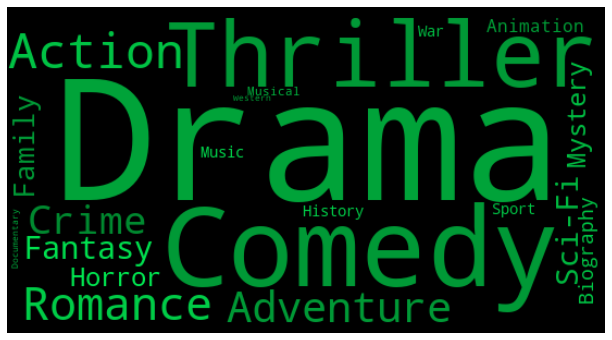

In [425]:
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

words = dict()
trunc_occurences = keyword_occurences[0:50]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(14, 6))
wordcloud = WordCloud(width=550,height=300, background_color='black', 
                      max_words=1628,relative_scaling=0.7,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [292]:
#delete genre
print("Number of observation before removing:",dataset.shape)
dataset.drop(['genres'], axis=1, inplace=True)
print("Number of observation after removing:",dataset.shape)

Number of observation before removing: (3806, 16)
Number of observation after removing: (3806, 15)


In [293]:
idx = ['duration', 'director_facebook_likes', 'actor_1_facebook_likes',
        'num_voted_users', 'facenumber_in_poster', 'country',
       'content_rating', 'budget', 'title_year', 'aspect_ratio',
       'movie_facebook_likes', 'other_actors_facebook_likes',
       'critic_review_ratio','gross','movie_score']

In [294]:
dataset=dataset.reindex(columns=idx)

In [708]:
dataset.to_excel("/Users/Hemanshu/Documents/imdb_dataset.xls")

In [100]:
dataset = pd.read_excel("imdb_dataset.xls")

#### Applyying OneHotEncoding to Convert the- categorical variables

In [101]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

for column in dataset.columns:
    if dataset[column].dtype == type(object):
        le = LabelEncoder()
        dataset[column] = le.fit_transform(dataset[column])

In [102]:
for column in dataset.columns:
    if dataset[column].dtype == type(object):        
        oht = OneHotEncoder()
        dataset[column] = oht.fit_transform(dataset[column]).toarray()

Lets classify our movie as good or bad based on rating
if 0<=movie_score<= 5 then it was not a hit movie otherwise it was a hit 

In [103]:
dataset.loc[dataset['movie_score'] <= 5, 'movie_score'] = 0
dataset.loc[dataset['movie_score'] > 5, 'movie_score'] = 1

In [104]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,14].values

In [105]:
x_d =['duration', 'director_facebook_likes', 'actor_1_facebook_likes',
       'num_voted_users', 'facenumber_in_poster', 'country', 'content_rating',
       'budget', 'title_year', 'aspect_ratio', 'movie_facebook_likes',
       'other_actors_facebook_likes', 'critic_review_ratio', 'gross']

### 4. Modeling

In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score,precision_score

In [145]:
x_train_res, x_val_res, y_train_res, y_val_res = train_test_split(x, y, test_size = .2, random_state=12)

In [146]:
#fit a Random Forest model on training data - 
clf_rf = RandomForestClassifier(n_estimators=25, max_depth=50, random_state=12,oob_score=True)
clf_rf = clf_rf.fit(x_train_res, y_train_res)
print('Accuracy:',clf_rf.score(x_val_res, y_val_res))
print ('Recall:',recall_score(y_val_res, clf_rf.predict(x_val_res)))
print('Precision:',precision_score(y_val_res, clf_rf.predict(x_val_res)))

Accuracy: 0.9068241469816273
Recall: 0.9927745664739884
Precision: 0.9123505976095617


In [147]:
# Calculate OOB Score
print("The OOB Score is: " + str(clf_rf.oob_score_))

The OOB Score is: 0.9073587385019711


#### K-Fold Cross Validation

Cross-validation is a procedure used to avoid overfitting and estimate the skill of the model on new data.
The value for k is chosen such that each train/test group of data samples is large enough to be statistically representative of the broader dataset.

In [110]:
rf_result = cross_val_score(clf_rf, x_train_res, y_train_res, scoring='accuracy', cv=5)

rf_result.mean()

0.9195189818809318

In [111]:
pred = clf_rf.predict(x_val_res)

import sklearn
cm = pd.DataFrame(sklearn.metrics.confusion_matrix(y_val_res,pred))
print(cm)

   0    1
0  4   66
1  5  687


#### Model Tuning

a. Tree Depth

1 depth
AUC Train:  0.8393941971562005
AUC Test:  0.5567299752270851
2 depth
AUC Train:  0.9231743322668629
AUC Test:  0.6334434351775392
3 depth
AUC Train:  0.9147038486233748
AUC Test:  0.5891618497109826
4 depth
AUC Train:  0.9654430608985791
AUC Test:  0.6011147811725847
5 depth
AUC Train:  0.9454865246047381
AUC Test:  0.540606936416185
10 depth
AUC Train:  0.9864614945588049
AUC Test:  0.5613129644921553


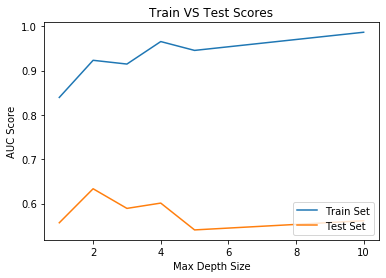

In [112]:
np.seterr(divide='ignore', invalid='ignore')
import warnings
warnings.filterwarnings("ignore")

results1 = []
results2 = []
max_depth_size  = [1,2,3,4,5,10]

for depth in max_depth_size:
    clf_rf = RandomForestClassifier(depth, oob_score=True, n_jobs=-1, random_state=12)
    clf_rf.fit(x_train_res, y_train_res)
    print(depth, 'depth')
    pred1 = clf_rf .predict(x_train_res)
    pred2 = clf_rf .predict(x_val_res)
    roc1 = roc_auc_score(y_train_res, pred1)
    roc2 = roc_auc_score(y_val_res, pred2)
    print('AUC Train: ', roc1)
    print('AUC Test: ', roc2)
    results1.append(roc1)
    results2.append(roc2)

plt.plot(max_depth_size, results1, label='Train Set')
plt.plot(max_depth_size, results2, label='Test Set')
plt.xlabel('Max Depth Size')
plt.ylabel('AUC Score')
plt.title('Train VS Test Scores')
plt.legend(loc="lower right")
plt.show()

b. Number of trees

1 trees
Accuracy:  0.8595800524934383
2 trees
Accuracy:  0.8123359580052494
3 trees
Accuracy:  0.9068241469816273
4 trees
Accuracy:  0.8818897637795275
5 trees
Accuracy:  0.9002624671916011
15 trees
Accuracy:  0.9120734908136483
20 trees
Accuracy:  0.9120734908136483
25 trees
Accuracy:  0.9068241469816273
40 trees
Accuracy:  0.9081364829396326
50 trees
Accuracy:  0.910761154855643
70 trees
Accuracy:  0.9081364829396326
100 trees
Accuracy:  0.9041994750656168


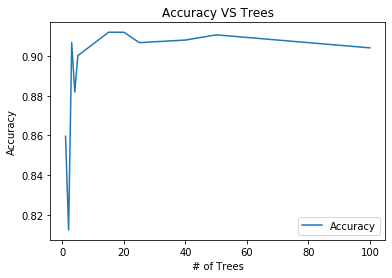

In [113]:
results = []
n_estimator_options = [1, 2, 3, 4, 5, 15, 20, 25, 40, 50, 70, 100]

for trees in n_estimator_options:
    clf_rf = RandomForestClassifier(trees, oob_score=True, random_state=12)
    clf_rf.fit(x_train_res, y_train_res)
    print(trees, 'trees')
    acc = clf_rf.score(x_val_res, y_val_res)
    print('Accuracy: ', acc)
    results.append(acc)
    
plt.plot(n_estimator_options, results, label='Accuracy')
plt.xlabel('# of Trees')
plt.ylabel('Accuracy')
plt.title('Accuracy VS Trees')
plt.legend(loc="lower right")
plt.show()

c. Min Sample Leaf

1 min samples
Accuracy:  0.9068241469816273
2 min samples
Accuracy:  0.9146981627296588
3 min samples
Accuracy:  0.9120734908136483
4 min samples
Accuracy:  0.9094488188976378
5 min samples
Accuracy:  0.9068241469816273
6 min samples
Accuracy:  0.905511811023622
7 min samples
Accuracy:  0.905511811023622
8 min samples
Accuracy:  0.9041994750656168
9 min samples
Accuracy:  0.9081364829396326
10 min samples
Accuracy:  0.9068241469816273
20 min samples
Accuracy:  0.9068241469816273


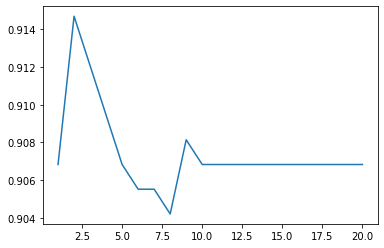

In [114]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,20]

for min_samples in min_samples_leaf_options:
    clf_rf = RandomForestClassifier(n_estimators=25, oob_score=True, n_jobs=-1, random_state=12, 
                                    max_features="auto", min_samples_leaf=min_samples)
    clf_rf.fit(x_train_res, y_train_res)
    print(min_samples, "min samples")
    acc = clf_rf.score(x_val_res, y_val_res)
    print('Accuracy: ', acc)
    results.append(acc)
    
pd.Series(results, min_samples_leaf_options).plot()

### 5.Evaluation

Passing the parameters which we got after model tuning in Random Forest

In [148]:
#fit a Random Forest model on training data - 
clf_rf = RandomForestClassifier(max_depth=10, n_estimators=20,  min_samples_leaf =2, random_state=12,oob_score=True)
clf_rf = clf_rf.fit(x_train_res, y_train_res)
print('Accuracy:',clf_rf.score(x_val_res, y_val_res))
print ('Recall:',recall_score(y_val_res, clf_rf.predict(x_val_res)))
print('Precision:',precision_score(y_val_res, clf_rf.predict(x_val_res)))

Accuracy: 0.9081364829396326
Recall: 0.9956647398843931
Precision: 0.9113756613756614


In [142]:
pred = clf_rf.predict(x_val_res)

import sklearn
cm = pd.DataFrame(sklearn.metrics.confusion_matrix(y_val_res,pred))
print(cm)

   0    1
0  3   67
1  3  689


There is little improvement in accuracy and recall aftet hyperparameter tuning

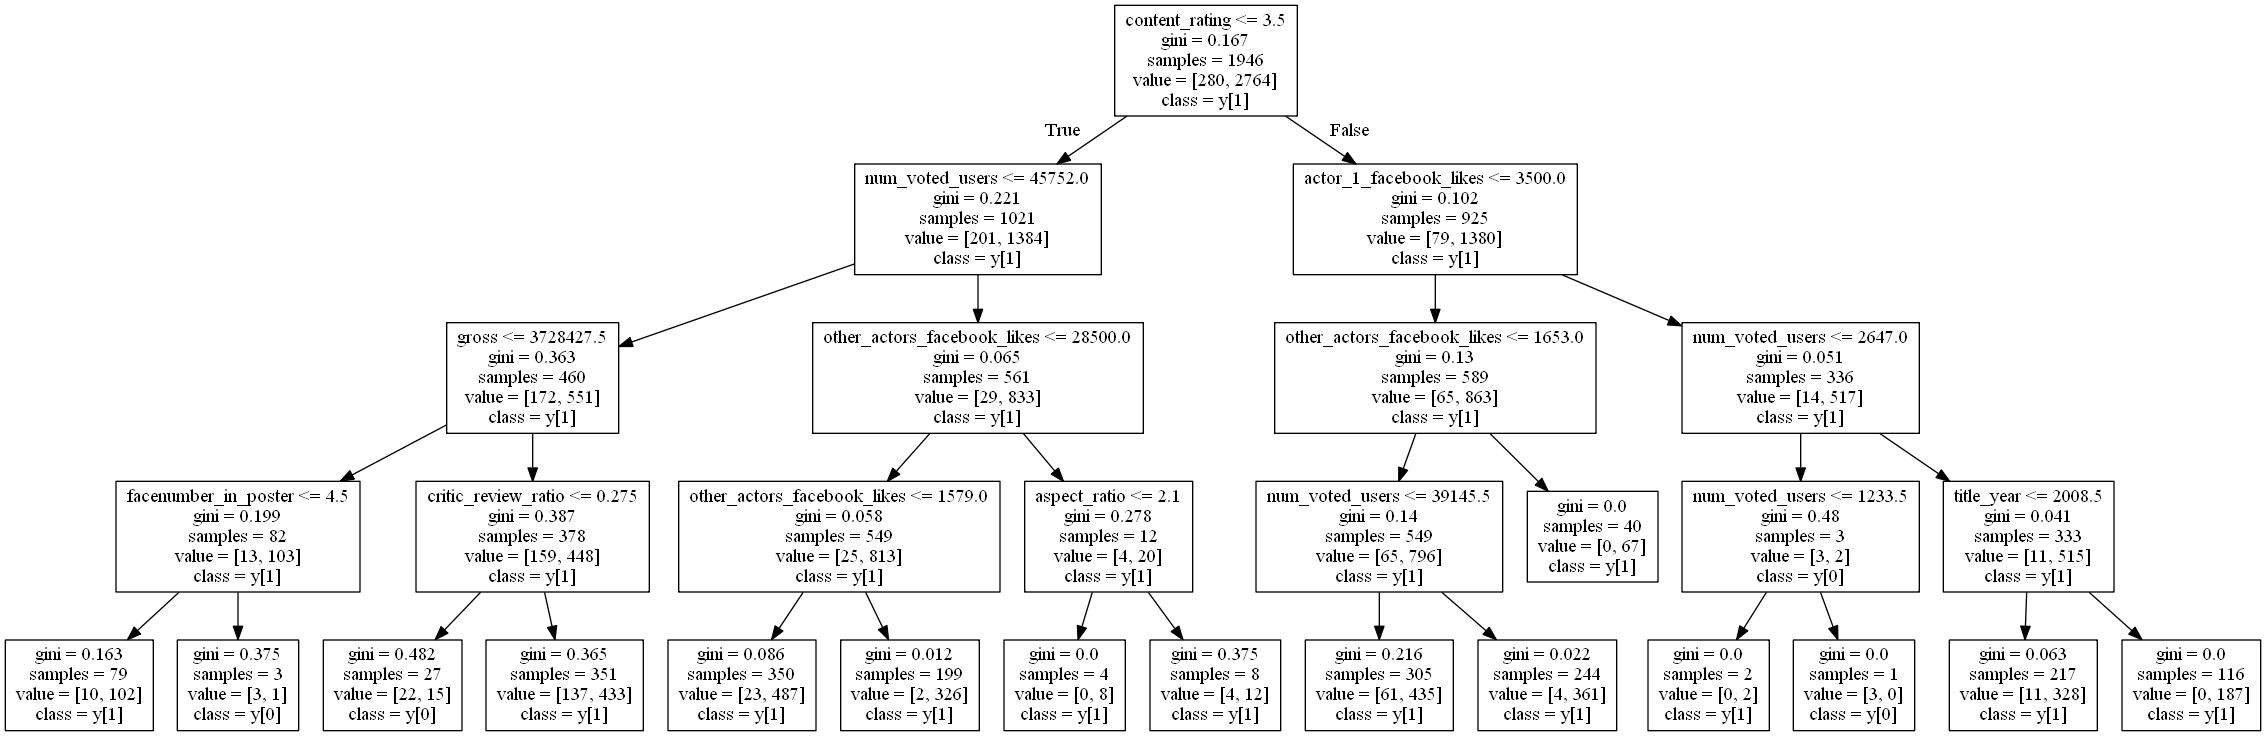

In [143]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus


m = RandomForestClassifier(n_estimators=20, max_depth=4)
m = m.fit(x_train_res, y_train_res)
# Create DOT data
dot_data = tree.export_graphviz(m.estimators_[0], out_file=None, 
                                feature_names=x_d,  
                                class_names=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

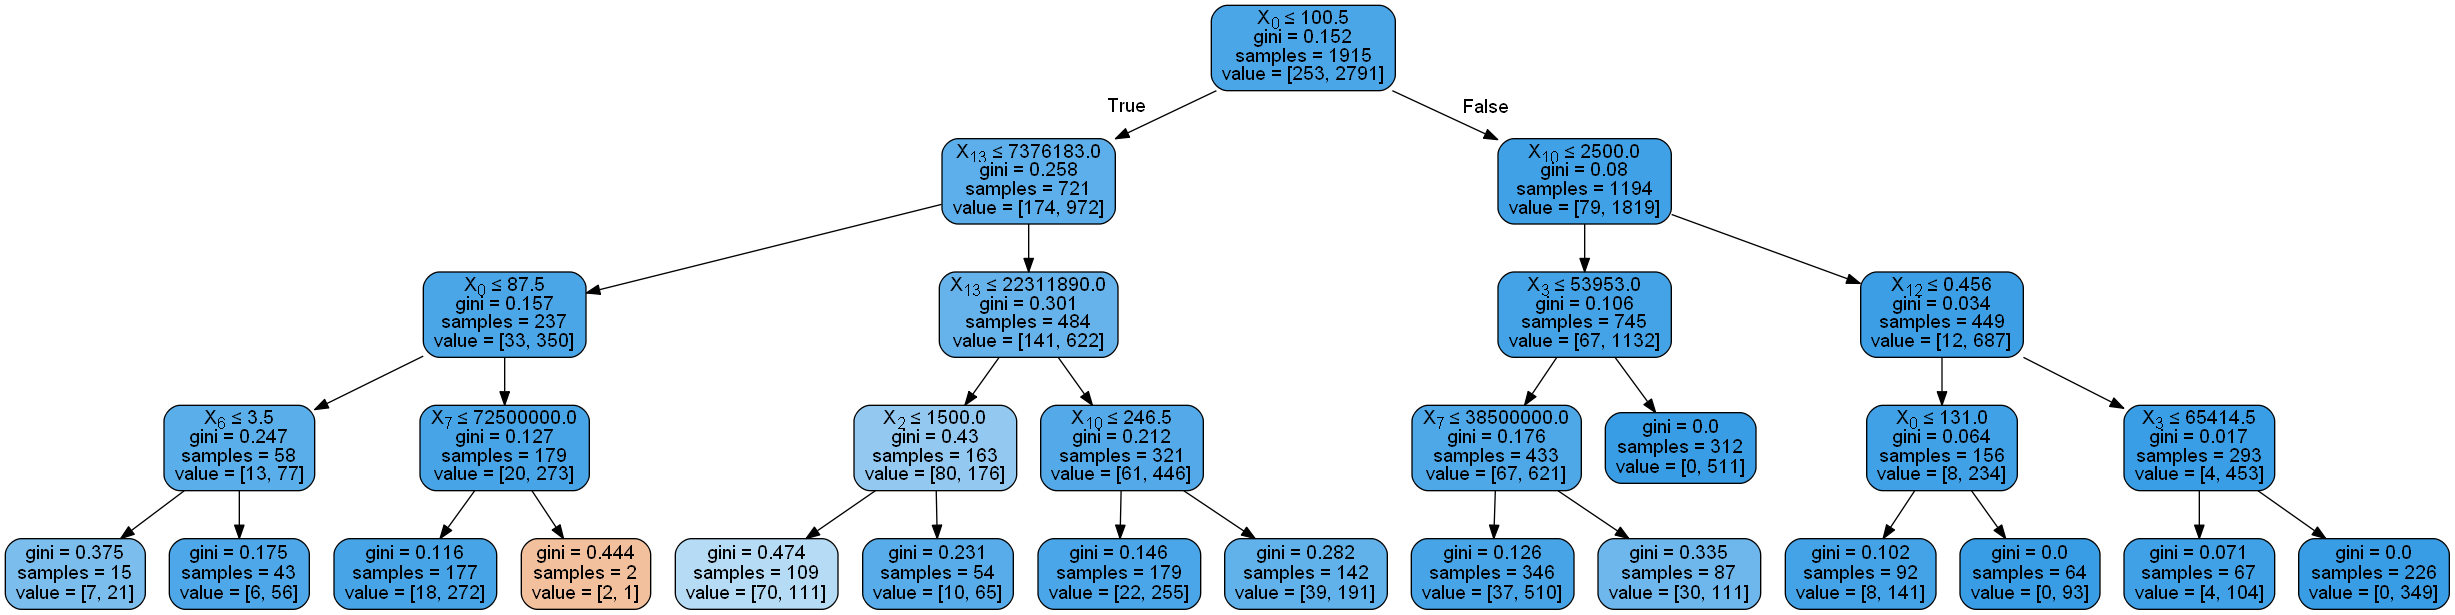

In [139]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf_rf.estimators_[0], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

duration                       0.165613
director_facebook_likes        0.050020
actor_1_facebook_likes         0.124234
num_voted_users                0.269905
facenumber_in_poster           0.013876
country                        0.000729
content_rating                 0.045206
budget                         0.055282
title_year                     0.031392
aspect_ratio                   0.007334
movie_facebook_likes           0.042457
other_actors_facebook_likes    0.034463
critic_review_ratio            0.071284
gross                          0.088205
dtype: float64


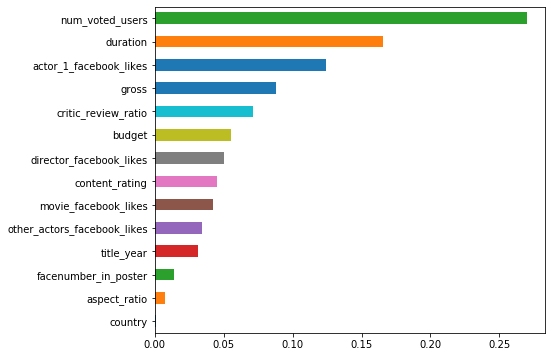

In [140]:
feature_importances = pd.Series(clf_rf.feature_importances_, index=x_d)
print(feature_importances)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind='barh', figsize=(7,6))